In [8]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1200,
              'height': 600,
              'scroll': True,
    'exclude_input_prompt' : True,
        'exclude_output_prompt' : True,
})

{'width': 1200,
 'height': 600,
 'scroll': True,
 'exclude_input_prompt': True,
 'exclude_output_prompt': True}

# Proxy Attention : Replacing Attention with Gradient Based Methods
- Masters Thesis Project : Subhaditya Mukherjee
- Supervised by : S.H. Mohades Kasaei, M.A. (Matias) Valdenegro Toro

# Intuition
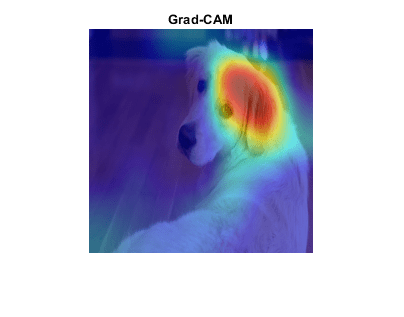

# Literature Survey

In [11]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

graph_string = """
graph TD;
E2[DeconvNet] --> E1
E3[Deep_Inside_Convolutional_Networks] --> E1
E1[Guided_BackProp]

B1[CAM] --> B2[GradCAM] --> B3[GradCAM++]

E4[Network In Network] --> B1

B2 --> B4[Guided_GradCAM]
E1 --> B4

E2 --> A[Salience_Map]
E3 --> A
E1 --> A

C0[Integrated Gradients] --> C1
E1 --> C1
C1[Smooth-Grad] --> C4
C2[SmoothGrad Square] --> C4
C3[VarGrad] --> C4
C4[Noise Tunnel]

U1[The Unreliability of Saliency Methods] --Changes break saliency--> A
U2[Interpretation of Neural networks is fragile] --Adversarial Attacks--> A
U3[Real Time Image Saliency for Black Box Classifiers] --New metric--> U1 

class A internal-link
class B internal-link
class B1 internal-link
class B2 internal-link
class B3 internal-link
class B4 internal-link
class C internal-link
class C0 internal-link
class C1 internal-link
class C2 internal-link
class C3 internal-link
class C4 internal-link
class D internal-link
class E internal-link
class F internal-link
class E1 internal-link
class E2 internal-link
class E3 internal-link
class E4 internal-link
class U1 internal-link
class U2 internal-link
class U3 internal-link
"""

In [12]:
mm(graph_string)

# Architecture

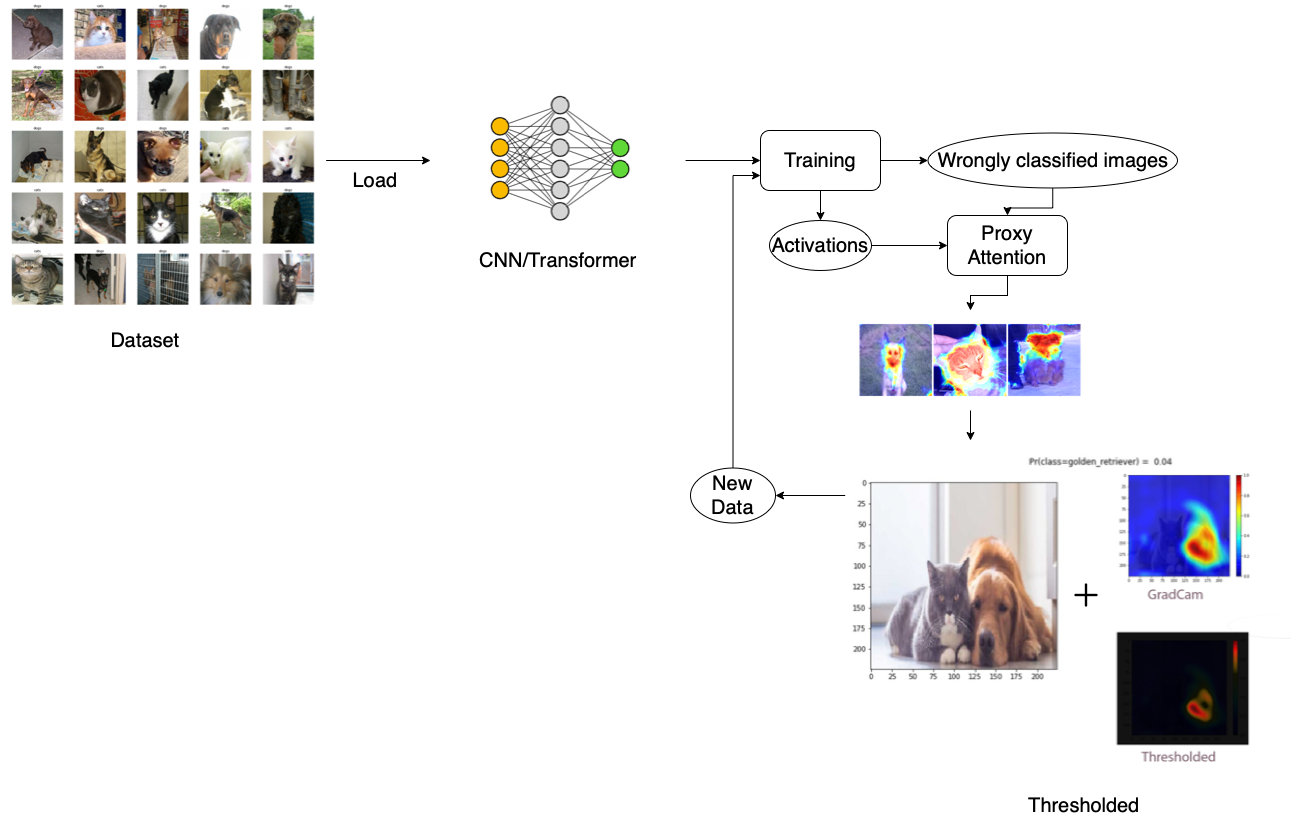

# Tunable Knobs
- Duration of training before and after Proxy Attention
- Subset of wrongly classified examples taken
- Method of weighting the pixels with the gradients
- Threshold of weighting
- Different architectures/XAI algorithms

# Tiny Demo

## Dataset
- American Sign Language Dataset (Just a test)
- 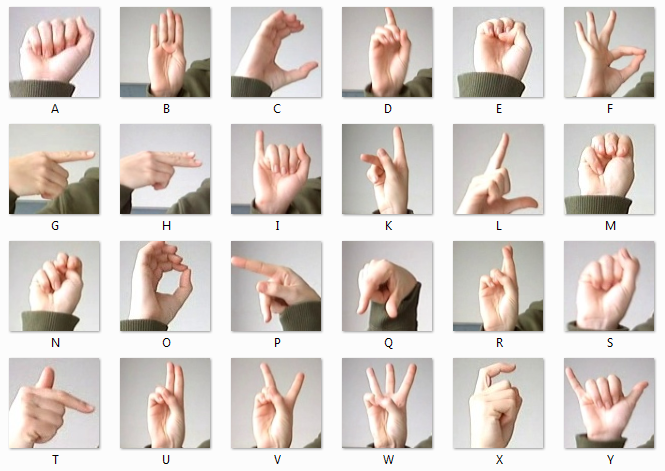

## Model
- ResNet18 , No Transfer Learning
- Cross Entropy
- Adam , lr = 3e-4
- 10 epochs

## Saliency Map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


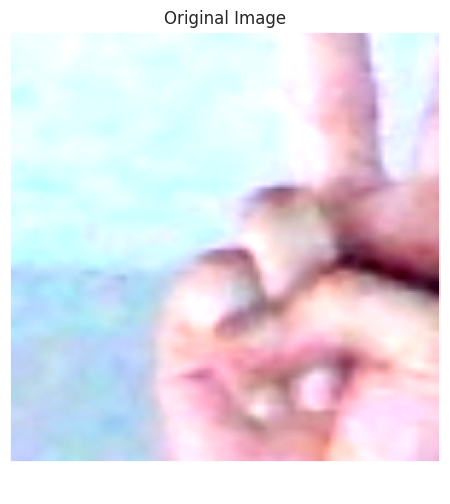

In [33]:
var = 0.008
original_image = np.transpose((inputs[ind].cpu().detach().numpy() / 2) + 0.5, (1,2,0))
_ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Original Image",alpha_overlay = 0.2, show_colorbar = True)

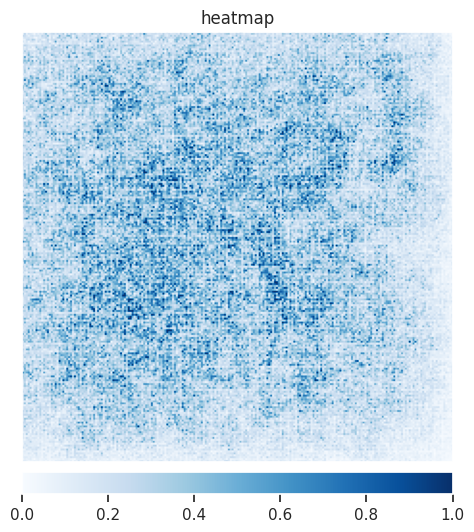

In [34]:
_ = viz.visualize_image_attr(grads[ind], original_image, 
                      method="heat_map", title="heatmap",alpha_overlay = 1.0, show_colorbar = True)

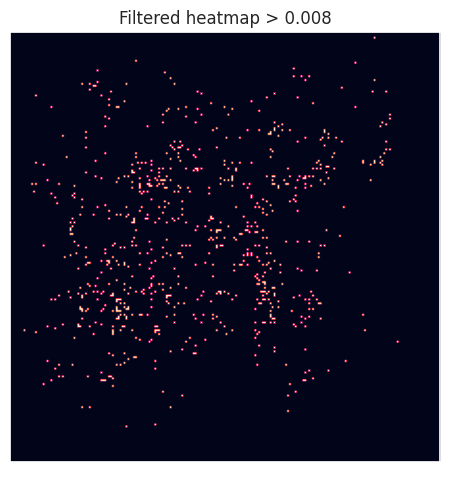

In [35]:
filtered_by_threshold = grads[ind].mean(axis = 2) > var

_ = viz.visualize_image_attr(None, filtered_by_threshold, 
                      method="original_image", title=f"Filtered heatmap > {var}",alpha_overlay = 0.8, show_colorbar = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


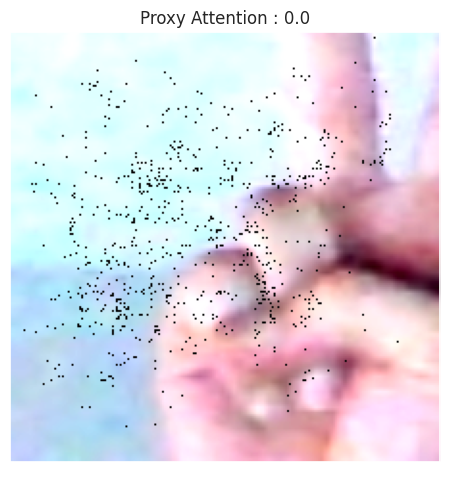

In [36]:
original_image[grads[ind].mean(axis = 2) > 0.008] = 0.0
_ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Proxy Attention : 0.0",alpha_overlay = 0.2, show_colorbar = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


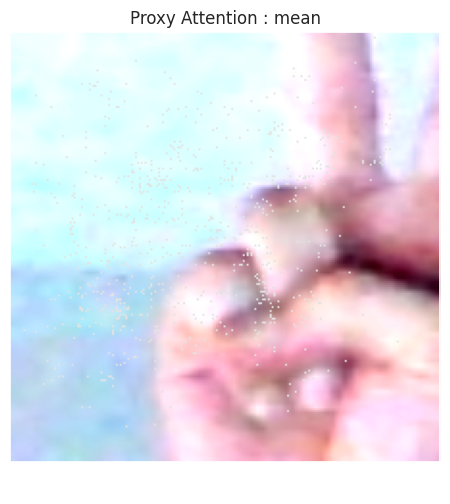

In [37]:
original_image[grads[ind].mean(axis = 2) > 0.008] = original_image.mean()
_ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Proxy Attention : mean",alpha_overlay = 0.2, show_colorbar = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


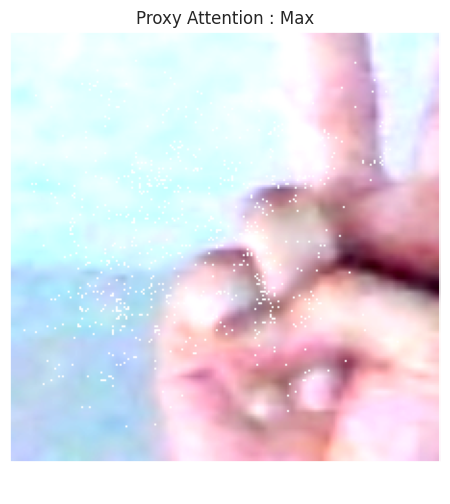

In [38]:
original_image[grads[ind].mean(axis = 2) > 0.008] = original_image.max()
_ = viz.visualize_image_attr(None, original_image, 
                      method="original_image", title="Proxy Attention : Max",alpha_overlay = 0.2, show_colorbar = True)

# Tests

## Tasks
- Classification (priority)
- Text classification (maybe)

## Networks
- Resnet18, 34
- MobileNet
- Original Vision Transformer
- Tab Net (maybe)

## Datasets
- Start with imagenette and ASL dataset (not ImageNet)
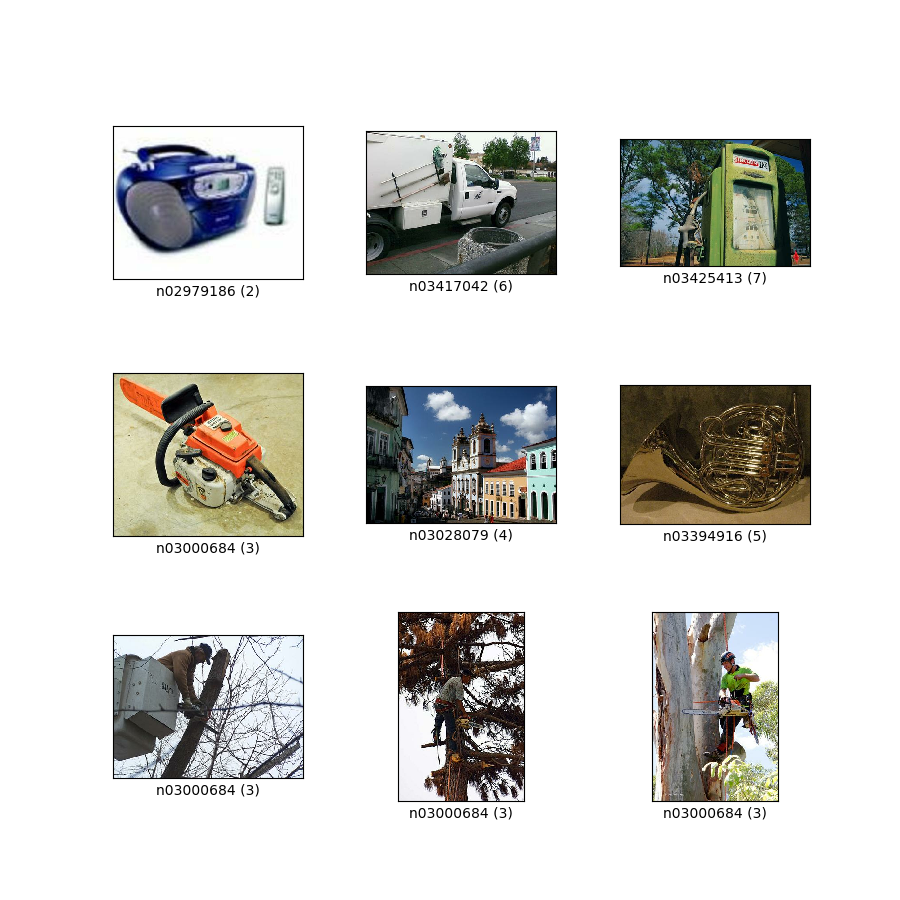

# Advantages (potentially)
- Lesser training data
- Faster convergence
- Better explainability (?)

# Current Challenges
- Name ):
- Framework
- Multiple params - Too many tests
- Transformers might be hard to compare with
- XAI algorithms might add extra bias/noise

# Thank you!